Uvozimo pakete

In [1]:
import main
import pandas as pd
from spremenljivke import *
from collections import Counter
%matplotlib inline

Pridobimo željene podatke

In [2]:
#main.main(True, True, prva_stran, zadnja_stran)
razpredelnica = pd.read_csv(pot_slovar)
razpredelnica.count()

ime                200
oblika             200
vrsta              195
izgovor            200
tonemski naglas    200
dtype: int64

Poglejmo si razpredelnivco pridobljenih podatkov

In [3]:
razpredelnica

,ime,oblika,vrsta,izgovor,tonemski naglas
0,á,{'--'},samostalnik moškega spola,set(),{'ā'}
1,à,set(),prislov,"{'á', 'à '}",{'ȁ; ȃ'}
2,à,set(),členek,set(),{'ȁ'}
3,a,set(),členek,set(),set()
4,a,set(),veznik,set(),set()
...,...,...,...,...,...
195,ad hoc,set(),prislov,"{'athòk', 'athók '}",{'ọ̑; ȍ'}
196,adiabáta,{'-e'},samostalnik ženskega spola,set(),{'ȃ'}
197,adiabáten,"{'-o', '-tna'}",pridevnik,set(),{'ȃ'}
198,adiabátičen,"{'-o', '-čna'}",pridevnik,set(),{'á'}


Poglejmo si koliko je posamezne besedne vrste

In [4]:
število_vrste = razpredelnica.groupby("vrsta")[["ime"]].agg("count")
število_vrste.rename(columns={"ime":"število"}, inplace=True)
število_vrste.sort_values("število", inplace=True, ascending=False)
število_vrste

,število
vrsta,
pridevnik,58
samostalnik moškega spola,56
samostalnik ženskega spola,50
dovršni in nedovršni glagol,8
samostalnik srednjega spola,7
prislov,7
nedovršni in dovršni glagol,4
medmet,2
členek,2


<Axes: xlabel='vrsta'>

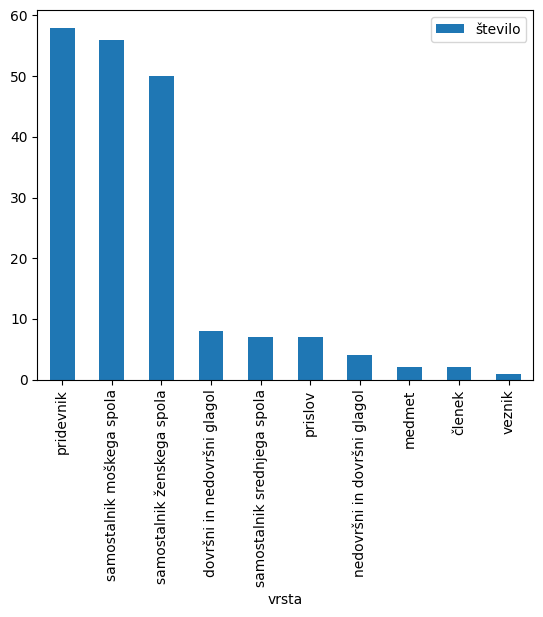

In [5]:
število_vrste.plot.bar()

Kot lahko vidite, to niso le besedna vrste ampak tudi dodatni podatki kot so spol in dovršnost. Zaradi teh dodatnih podatkov težje vidimo koliko je besed posamezne besedne vrste. To lahko spremenimo s pomočjo spodnje funkcije `štetje_vrst()`, ki združi podatke iz stolpca `"vrsta"` v dejanske vrste.

In [13]:
besedne_vrste = ["samostalnik", "zaimek", "števnik", "pridevnik", "prislov", "glagol"]
raz_vrste = razpredelnica.copy()
for vrsta in besedne_vrste:
    raz_vrste.loc[raz_vrste["vrsta"].apply(lambda x: type(x) != float and vrsta in x), "vrsta"] = vrsta
raz_vrste.loc[raz_vrste["vrsta"].apply(lambda x: type(x) == float), "vrsta"] = "neznano"

def štetje_stolpca(raz, stolpec):
    raz = raz.groupby(stolpec)[[stolpec]].agg("count")
    raz.rename(columns={stolpec:"število"}, inplace=True)
    raz.sort_values("število", inplace=True, ascending=False)
    return raz

štetje_stolpca(raz_vrste, "vrsta")

,število
vrsta,
samostalnik,113
pridevnik,58
glagol,12
prislov,7
neznano,5
medmet,2
členek,2
veznik,1


<Axes: xlabel='vrsta'>

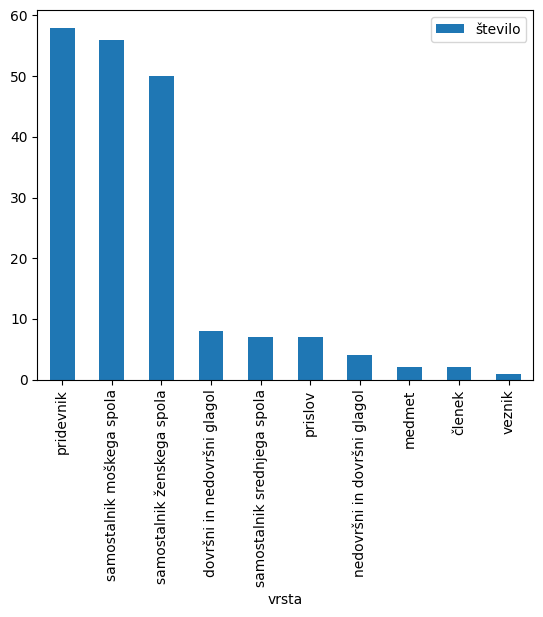

In [10]:
štetje_stolpca(razpredelnica, "vrsta").plot.bar()

Sedaj ko smo uspeli ločiti besede na posamezne besedne vrste, lahko iščemo povprečno besedo besedne vrste.
Povprečna beseda je tisti niz črk, za katerega velja, da je njegova dolžina toliko kolikor je povprečje dolžin besed (zaokroženo seveda na celo število) in njegova i-ta črka je tista, ki se največkrat pojavi na i-tem mestu besed. 

In [36]:
def razpredelnica_vrste(raz, vrsta):
    seznam = raz["vrsta"].apply(lambda x: type(x) != float and vrsta in x)
    return raz.loc[seznam,]


def črka_besede(i, beseda):
    if len(beseda)<=i:
        return 
    return beseda[i]

def povprečna_beseda(razpredelnica):
    dolžina = round(razpredelnica["ime"].apply(len).sum()/razpredelnica["ime"].count())
    odg = ""
    for i in range(dolžina):
        seznam = razpredelnica["ime"].apply(lambda beseda: črka_besede(i, beseda))
        crke = Counter(seznam).most_common()
        if crke[0][0] == None:
            odg += crke[1][0]
        else:
            odg += crke[0][0]
    return odg
# razpredelnica
# razpredelnica_vrste(razpredelnica, "samostalnik moškega spola")
povprečna_beseda(razpredelnica_vrste(razpredelnica, "samostalnik"))

'abstrátna'

Sedaj se osredotočimo le na samostalnike. 

In [38]:
razpredelnica_samostalnikov = razpredelnica_vrste(razpredelnica, "samostalnik")
razpredelnica_samostalnikov


,ime,oblika,vrsta,izgovor,tonemski naglas
0,á,{'--'},samostalnik moškega spola,set(),{'ā'}
7,ábak,"{'-a', 'ábakus'}",samostalnik moškega spola,set(),{'ȃ'}
8,abalienácija,{'-e'},samostalnik ženskega spola,set(),{'á'}
10,abbé,{'-ja'},samostalnik moškega spola,{'abé -êja'},{'ẹ̑ ȇ'}
11,abc,"{'abecé', '--'}",samostalnik moškega spola,"{'abẹcé ', 'abəcə̀'}",{'ẹ̑; ə̏'}
...,...,...,...,...,...
189,adépt,{'-a'},samostalnik moškega spola,set(),{'ẹ̑'}
191,adhezíja,{'-e'},samostalnik ženskega spola,set(),{'ȋ'}
194,adhezívnost,{'-i'},samostalnik ženskega spola,set(),{'ȋ'}
196,adiabáta,{'-e'},samostalnik ženskega spola,set(),{'ȃ'}


In [ ]:
# prva_ženska_sklanjatev = razpredelnica_samostalnikov.loc[]
# (razpredelnica_samostalnikov["vrsta"] == "samostalnik ženskega spola") & "-e" in razpredelnica_samostalnikov["oblika"]
# prva_ženska_sklanjatev